In [1]:
from karateclub import Graph2Vec
from kuramoto import Kuramoto
from kuramoto.db_metrics import *
import networkx as nx

In [2]:
df = gen_all(100, 200, 2000, edge_var="L", random_K=False, half_sync=False)
label = df['Concentrated']
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,s100_197,s100_198,s100_199,s100_200,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Concentrated
0,0.168559,0.037086,0.049400,-0.031705,-0.069191,0.117611,-0.102378,0.130878,0.020839,0.116267,...,0.924732,0.928035,0.931396,0.934818,987,100,16,26,3,0
1,0.104338,0.043800,-0.056197,0.063614,0.004027,0.042898,-0.068272,-0.003235,0.104627,0.091293,...,1.629300,1.631654,1.633979,1.636273,1084,100,18,26,3,0
2,0.052742,-0.034092,-0.110150,0.060989,-0.001603,0.070279,-0.076680,0.004518,0.131270,0.115665,...,-0.909253,-0.913922,-0.918546,-0.923126,1362,100,21,35,3,0
3,0.119267,-0.064214,0.017438,0.115252,-0.019003,0.066700,-0.059427,0.063569,0.150373,0.037772,...,-2.093291,-2.102835,-2.112403,-2.121995,1250,100,19,30,3,0
4,0.102156,0.056769,-0.100317,0.091559,0.079542,0.020100,-0.161684,-0.023736,0.158784,0.101625,...,2.508751,2.503987,2.499265,2.494587,1420,100,21,34,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.186315,-0.068165,-0.115783,0.054401,-0.065057,0.109071,-0.113099,0.177932,0.116670,0.286704,...,2.742289,2.753134,2.763948,2.774728,842,100,14,22,3,0
1996,0.123966,0.053435,-0.091152,0.063039,0.059867,-0.041329,-0.098714,0.060129,0.188391,0.062366,...,-1.446616,-1.451538,-1.456418,-1.461257,1554,100,22,41,2,0
1997,0.275030,-0.127468,-0.183613,-0.048713,-0.000635,0.297535,-0.165814,0.132376,0.457312,0.391819,...,0.920801,0.922859,0.924931,0.927019,770,100,14,20,4,0
1998,0.134865,-0.067225,0.005782,0.064369,-0.060441,0.032510,-0.031180,0.120518,0.098993,0.159510,...,-0.009381,-0.014316,-0.019195,-0.024019,1186,100,17,30,3,0


## Only Dynamics

In [3]:
df1 = df.loc[:,'s1_1':'s100_200']
df1 = pd.concat([df1, label], axis=1)
df1

,s1_1,s1_2,s1_3,s1_4,s1_5,s1_6,s1_7,s1_8,s1_9,s1_10,...,s100_192,s100_193,s100_194,s100_195,s100_196,s100_197,s100_198,s100_199,s100_200,Concentrated
0,0.482171,0.472784,0.463399,0.454017,0.444639,0.435265,0.425895,0.416531,0.407174,0.397823,...,0.909063,0.912088,0.915166,0.918299,0.921487,0.924732,0.928035,0.931396,0.934818,0
1,3.757987,3.747985,3.737975,3.727959,3.717935,3.707903,3.697864,3.687817,3.677762,3.667699,...,1.617073,1.619579,1.622054,1.624499,1.626915,1.629300,1.631654,1.633979,1.636273,0
2,4.019854,4.016517,4.013192,4.009877,4.006573,4.003279,3.999995,3.996721,3.993456,3.990201,...,-0.885218,-0.890118,-0.894972,-0.899778,-0.904538,-0.909253,-0.913922,-0.918546,-0.923126,0
3,1.256856,1.249428,1.241912,1.234308,1.226616,1.218836,1.210968,1.203013,1.194972,1.186844,...,-2.045848,-2.055306,-2.064778,-2.074264,-2.083768,-2.093291,-2.102835,-2.112403,-2.121995,0
4,4.015656,4.025927,4.036216,4.046524,4.056852,4.067201,4.077570,4.087961,4.098374,4.108810,...,2.533201,2.528229,2.523298,2.518407,2.513558,2.508751,2.503987,2.499265,2.494587,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.101350,5.105030,5.108779,5.112600,5.116494,5.120460,5.124501,5.128616,5.132806,5.137073,...,2.687561,2.698574,2.709553,2.720498,2.731410,2.742289,2.753134,2.763948,2.774728,0
1996,6.076138,6.069507,6.062840,6.056140,6.049407,6.042643,6.035849,6.029026,6.022176,6.015300,...,-1.421378,-1.426509,-1.431599,-1.436646,-1.441652,-1.446616,-1.451538,-1.456418,-1.461257,0
1997,5.487250,5.484616,5.482062,5.479589,5.477195,5.474880,5.472644,5.470487,5.468407,5.466404,...,0.910712,0.912705,0.914710,0.916727,0.918757,0.920801,0.922859,0.924931,0.927019,0
1998,5.289203,5.292601,5.296039,5.299518,5.303040,5.306606,5.310216,5.313872,5.317576,5.321327,...,0.016167,0.010938,0.005770,0.000661,-0.004389,-0.009381,-0.014316,-0.019195,-0.024019,0


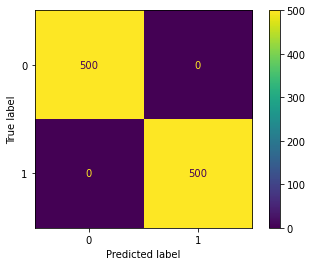

Precision: 1.000
Recall: 1.000
F1: 1.000
Accuracy: 1.000


In [4]:
X_train, X_test, y_train, y_test = generate_data(df1)
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

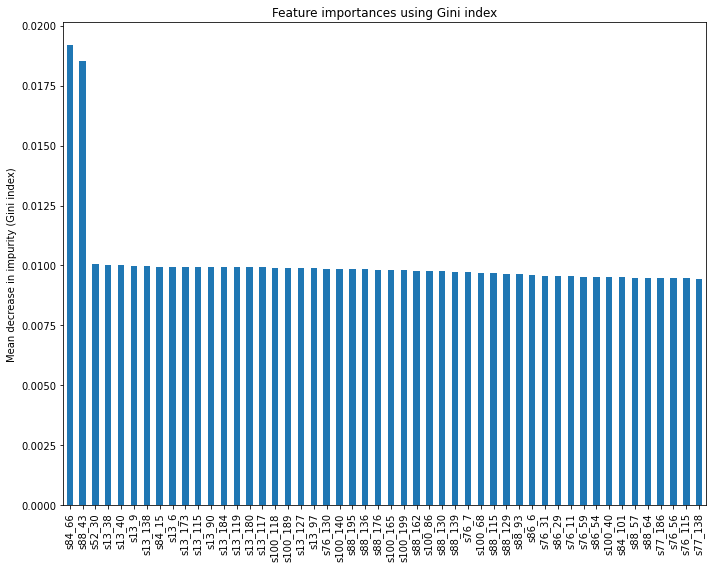

In [5]:
plot_gini_index(clf, X_train)

## Only graphs with adjacency matrix

In [6]:
df2 = df.loc[:,0:9999]
df2 = pd.concat([df2, label], axis=1)
df2

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Concentrated
0,0,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,0
1,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,0,0
3,0,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,0
4,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,1,1,1,1,1,1,0,0,...,0,1,1,1,1,1,1,1,0,0
1996,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
1997,0,1,1,1,1,1,1,1,0,0,...,0,1,1,1,1,1,1,1,0,0
1998,0,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,0


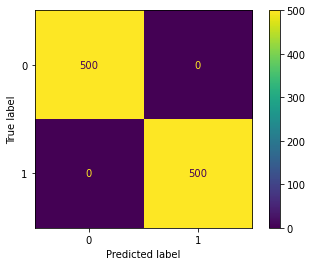

Precision: 1.000
Recall: 1.000
F1: 1.000
Accuracy: 1.000


In [7]:
X_train, X_test, y_train, y_test = generate_data(df2)
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

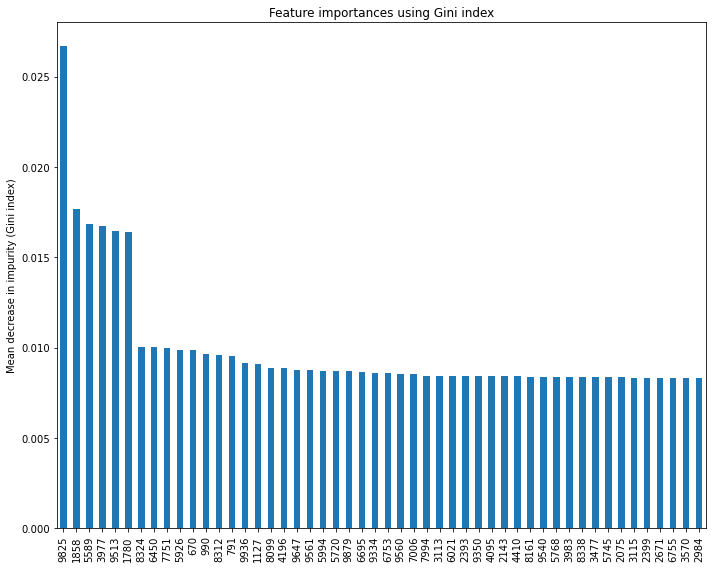

In [8]:
plot_gini_index(clf, X_train)

## Only graphs with graph2vec

In [9]:
df3 = df.loc[:,'f1':'f16']
df3 = pd.concat([df3, label], axis=1)
df3

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,Concentrated
0,0.168559,0.037086,0.049400,-0.031705,-0.069191,0.117611,-0.102378,0.130878,0.020839,0.116267,0.028740,0.098322,-0.239326,-0.080678,0.155493,0.162667,0
1,0.104338,0.043800,-0.056197,0.063614,0.004027,0.042898,-0.068272,-0.003235,0.104627,0.091293,0.140673,0.000763,-0.177736,-0.047789,0.025091,0.021392,0
2,0.052742,-0.034092,-0.110150,0.060989,-0.001603,0.070279,-0.076680,0.004518,0.131270,0.115665,0.130887,0.055846,-0.050765,0.037824,0.052389,0.065301,0
3,0.119267,-0.064214,0.017438,0.115252,-0.019003,0.066700,-0.059427,0.063569,0.150373,0.037772,0.096333,0.060154,-0.140376,-0.015071,0.102458,0.054674,0
4,0.102156,0.056769,-0.100317,0.091559,0.079542,0.020100,-0.161684,-0.023736,0.158784,0.101625,0.100746,0.036043,-0.114688,-0.010431,0.029140,0.031596,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.186315,-0.068165,-0.115783,0.054401,-0.065057,0.109071,-0.113099,0.177932,0.116670,0.286704,0.113130,0.137992,-0.179486,-0.046620,0.218689,0.157134,0
1996,0.123966,0.053435,-0.091152,0.063039,0.059867,-0.041329,-0.098714,0.060129,0.188391,0.062366,0.229350,0.003694,-0.107796,0.104975,0.125360,0.120755,0
1997,0.275030,-0.127468,-0.183613,-0.048713,-0.000635,0.297535,-0.165814,0.132376,0.457312,0.391819,0.200612,0.145156,0.035415,-0.105839,0.297929,0.314903,0
1998,0.134865,-0.067225,0.005782,0.064369,-0.060441,0.032510,-0.031180,0.120518,0.098993,0.159510,0.063372,0.084113,-0.084233,-0.027228,0.143882,0.034923,0


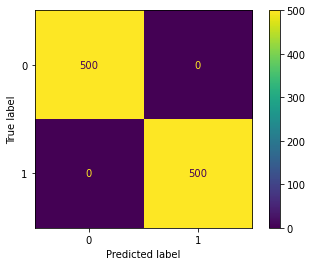

Precision: 1.000
Recall: 1.000
F1: 1.000
Accuracy: 1.000


In [10]:
X_train, X_test, y_train, y_test = generate_data(df3)
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

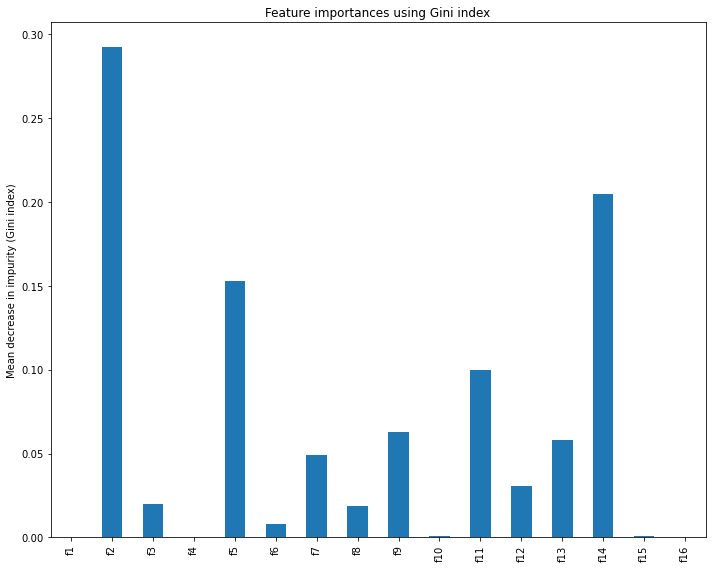

In [11]:
plot_gini_index(clf, X_train)